#Percolation Project

Leon Zhou

#Goal 

The goals for his project are:


1.   How does the probability of percolation depend on p?
2.   How does the probability of percolation depend on n?



First, import some necessary packages

In [0]:
import random
import math
import numpy
import matplotlib.pyplot as plt

Then, copy the code we have gone through from class. 

In [0]:
n = 10
p = 0.9

In [0]:
# use numpy to generate a matrix of random numbers between 0 and 1, then convert to either 0 or 1
grid = numpy.array((numpy.random.rand(n, n) > p).astype(int))
grid

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [0]:
########## CODE FROM MATH 242A ##########

# define an exception that will be raised if percolation occurs 
class percolationFound(Exception): 
  pass 

# matrix to indicate which squares have been searched
visited = numpy.zeros((n,n))  # 0 indicates not yet visited

# define the search function
def search(row, col,grid2):
  #print("searching row ", row, " and column ", col)
  
  # remember that this square has been visited
  visited[row,col] = 1
  
  # if we are at the bottom row, then stop
  if row == n-1:
    raise percolationFound ## raise an exception to indicate that percolation has been found 
  elif visited[row+1, col] == 0 and grid2[row + 1, col]==0: # then search down
    search(row + 1, col, grid2)
  
  # search left
  if col > 0 and visited[row, col-1] == 0 and grid2[row,col-1]==0:
    search(row, col - 1, grid2)
  
  # search right
  if col < n-1 and visited[row, col+1] == 0 and grid2[row,col+1]==0:
    search(row, col + 1, grid2)
  
  # search up
  if row > 0 and visited[row-1, col] == 0 and grid2[row-1,col]==0:
    search(row - 1, col, grid2)
  
  #print("finished searching row ", row, " and column ", col)  
  
## defin a function to start searching at each cellin the top row

def findPercolation(grid2):
  global visited 
  # matrix to indicate which squares have been searched
  visited = numpy.zeros((n,n))  # 0 indicates not yet visited
  
  try: 
    for i in range(n):
     #if the top cell in the column n is open and not visited, start searching there
     if grid2[0,i] == 0 and visited[0,i] == 0:
        search(0,i, grid2) 
        
  except percolationFound: 
    #print("percolationFound !")
    return True 
  else: 
    #print("no percolation")
    return False
    

Above is the code I copied from class. I just made several modification. For the function from class, both search and findpercolation do not have any input since the grid is been defined outside of the functions. But here I made some modifitions that each function takes input grid2 so that we do not have define and grid then call the functions every time I run those functions.  

In [0]:
print(grid)
findPercolation(grid)

[[0 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0]]


True

#Percentage of percolation vs. P holding n constant

When holding n constant, I picked n=10. Then, I tested when p=0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, and 0.9

Here i defined a function called totPerc (I named the funcion this way becasue originally the output was the total number of percolation happened but later I changed to the percentage of ercolation happened). 

The function takes number of trails as input. First, define number of percolation to 0 and set a p and the size of grid n. Then, there is a for loop which would repeat the following code(until return) number of trails times. Each time the loop run, it will generate a grid and test whether percolation happened or not, if there is percolation happaned, add 1 to numPerc. So, the numPerc would be the total number of percolation happened in numTrails. The output of the function should be number of percolations happened divided by total tails which gives the percentage of percolations happened

Next, I defined another function called avePerc which could calculate the average number of percentage of percolations happened after several runs. The function takes 2 inputs: numTrails and num . numTrails is the same as the totPerc function. num is a number control for the range and it will control for the number of times the totPerc runs. For example, if num=100, the variable numT should include 100 values, each is the percentage of percolation happend. The the output is numT divided by num, which would give us the averge of percolation happened for num of times. 

After, I created some x values and make a list of averge percent of percolation happened. Then I made a graph to display the relationship between average percentage of percolation as number of trails increases. In addition, I fit a regression line just to better illustrate the trend and strength of the relationship. 

## When p=0.1

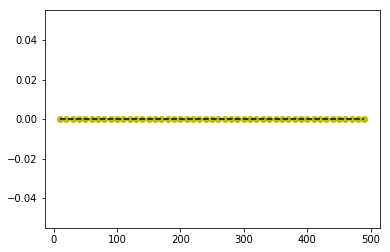

In [0]:
def totPerc(numTrails):
  numPerc = 0
  p=0.1
  n=10
  for _ in range(numTrails): ## run numTrails times 
    grid3 = numpy.array((numpy.random.rand(n, n) > p).astype(int))
    result = findPercolation(grid3)
    #print(result)  #check the result, should contain some True and some False 
    if result:
       numPerc += 1
  return numPerc/numTrails
  #return numPerc 
def avePerc(numTrails, num):
  numT = [totPerc(numTrails) for _ in range(num)]  
  return (sum(numT)/num)

xval0 = (range(10,500,10)) ##this chunk of lines might be slow 
avgT0 = [avePerc(i,100) for i in xval0]
fit = numpy.polyfit(xval0,avgT0,1)
fit_fn = numpy.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(xval0,avgT0, 'yo', xval0, fit_fn(xval0), '--k')

When p=0.1 which means that there are only around 10% 0 in the grid, the averge percentage of percolation is 0 when number of trails is from 0 the 500. A linear regression line might not be so helpful in this case. 

##When p= 0.2

For fitting a regression line, I checked code from Stack Flow:
https://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy

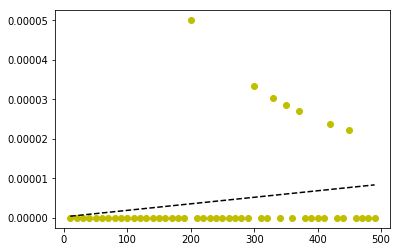

In [0]:
def totPerc(numTrails):
  numPerc = 0
  p=0.2
  n=10
  for _ in range(numTrails):
    grid3 = numpy.array((numpy.random.rand(n, n) > p).astype(int))
    result = findPercolation(grid3)
    #print(result)  #check the result, should contain some True and some False 
    if result:
       numPerc += 1
  return numPerc/numTrails

def avePerc(numTrails, num):
  numT = [totPerc(numTrails) for _ in range(num)]  
  return (sum(numT)/num)

xval = (range(10,500,10)) ##this chunk of lines might be slow 
avgT = [avePerc(i,100) for i in xval]

fit = numpy.polyfit(xval,avgT,1)
fit_fn = numpy.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(xval,avgT, 'yo', xval, fit_fn(xval), '--k')

When p=0.2, we could see from the graph that the majority of the points are still at 0, but there are few more that are not 0 meaning that it starts to have some percolation happens but only very few.

##When p = 0.3

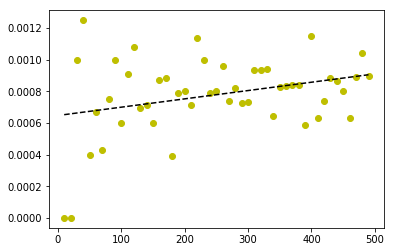

In [0]:
def totPerc(numTrails):
  numPerc = 0
  p=0.3
  n=10
  for _ in range(numTrails):
    grid3 = numpy.array((numpy.random.rand(n, n) > p).astype(int))
    result = findPercolation(grid3)
    #print(result)  #check the result, should contain some True and some False 
    if result:
       numPerc += 1
  return numPerc/numTrails

def avePerc(numTrails, num):
  numT = [totPerc(numTrails) for _ in range(num)]  
  return (sum(numT)/num)

xval = (range(10,500,10)) ##this chunk of lines might be slow 
avgT = [avePerc(i,100) for i in xval]

fit = numpy.polyfit(xval,avgT,1)
fit_fn = numpy.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(xval,avgT, 'yo', xval, fit_fn(xval), '--k')

Compare to p=0.2, p=0.3 definitely have more percolations happend, but the percentage is still very small and most of the points occur between 0.006 and 0.001 meanig that for most of the trails, the percentage of percolation is between 0.6% and 1% (these number may vary each time run, but should be close).

##When p =0.4

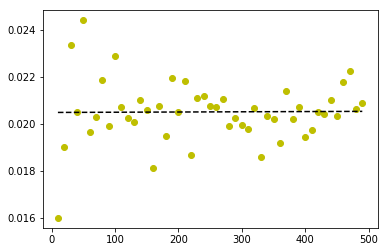

In [0]:
def totPerc(numTrails):
  numPerc = 0
  p=0.4
  n=10
  for _ in range(numTrails):
    grid3 = numpy.array((numpy.random.rand(n, n) > p).astype(int))
    result = findPercolation(grid3)
    #print(result)  #check the result, should contain some True and some False 
    if result:
       numPerc += 1
  return numPerc/numTrails

def avePerc(numTrails, num):
  numT = [totPerc(numTrails) for _ in range(num)]  
  return (sum(numT)/num)

xval = (range(10,500,10)) ##this chunk of lines might be slow 
avgT = [avePerc(i,100) for i in xval]

fit = numpy.polyfit(xval,avgT,1)
fit_fn = numpy.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(xval,avgT, 'yo', xval, fit_fn(xval), '--k')

From the plot, we could see that most of the points occur around 0.02, so most of the trails have around 2% of averge of percolation happened. 

##when p=0.5

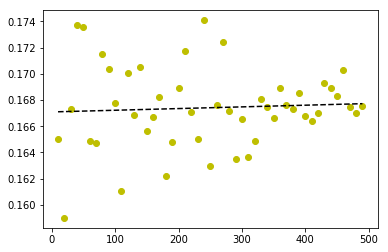

In [0]:
def totPerc(numTrails):
  numPerc = 0
  p=0.5
  n=10
  for _ in range(numTrails):
    grid3 = numpy.array((numpy.random.rand(n, n) > p).astype(int))
    result = findPercolation(grid3)
    #print(result)  #check the result, should contain some True and some False 
    if result:
       numPerc += 1
  return numPerc/numTrails

def avePerc(numTrails, num):
  numT = [totPerc(numTrails) for _ in range(num)]  
  return (sum(numT)/num)

xval = (range(10,500,10)) ##this chunk of lines might be slow 
avgT = [avePerc(i,100) for i in xval]

fit = numpy.polyfit(xval,avgT,1)
fit_fn = numpy.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(xval,avgT, 'yo', xval, fit_fn(xval), '--k')

When p=0.5, we could see a dramatic increase in aerge percentage of percolation happens. From the plot we could see that the regression line is around y=0.167 (this number may vary), and the largest outlier went up to 0.174 indicating that some trails have on average 17.4% of percolation happened. 

##When p = 0.6

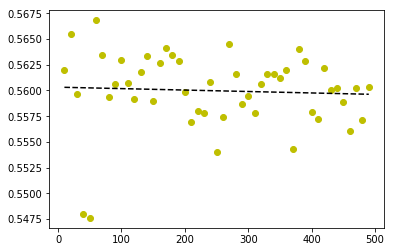

In [0]:
def totPerc(numTrails):
  numPerc = 0
  p=0.6
  n=10
  for _ in range(numTrails):
    grid3 = numpy.array((numpy.random.rand(n, n) > p).astype(int))
    result = findPercolation(grid3)
    #print(result)  #check the result, should contain some True and some False 
    if result:
       numPerc += 1
  return numPerc/numTrails

def avePerc(numTrails, num):
  numT = [totPerc(numTrails) for _ in range(num)]  
  return (sum(numT)/num)

xval = (range(10,500,10)) ##this chunk of lines might be slow 
avgT = [avePerc(i,100) for i in xval]

fit = numpy.polyfit(xval,avgT,1)
fit_fn = numpy.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(xval,avgT, 'yo', xval, fit_fn(xval), '--k')

when p=0.6, here is another dramatic increase. From the plot, we could see that the regression line went up to y=0.56 indicating most of the trails have had around 56% of percolation happened. 

##When p = 0.7 

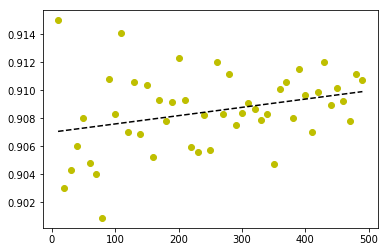

In [0]:
def totPerc(numTrails):
  numPerc = 0
  p=0.7
  n=10
  for _ in range(numTrails):
    grid3 = numpy.array((numpy.random.rand(n, n) > p).astype(int))
    result = findPercolation(grid3)
    #print(result)  #check the result, should contain some True and some False 
    if result:
       numPerc += 1
  return numPerc/numTrails

def avePerc(numTrails, num):
  numT = [totPerc(numTrails) for _ in range(num)]  
  return (sum(numT)/num)

xval = (range(10,500,10)) ##this chunk of lines might be slow 
avgT = [avePerc(i,100) for i in xval]

fit = numpy.polyfit(xval,avgT,1)
fit_fn = numpy.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(xval,avgT, 'yo', xval, fit_fn(xval), '--k')

When p=0.7, from the plot, we could see that the majorty of the points between 0.906 and 0.910 indicating there are a lot of trails have had 90.6% to 91% of perconaltion happened. 

##When p = 0.8

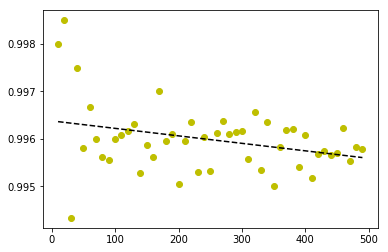

In [0]:
def totPerc(numTrails):
  numPerc = 0
  p=0.8
  n=10
  for _ in range(numTrails):
    grid3 = numpy.array((numpy.random.rand(n, n) > p).astype(int))
    result = findPercolation(grid3)
    #print(result)  #check the result, should contain some True and some False 
    if result:
       numPerc += 1
  return numPerc/numTrails

def avePerc(numTrails, num):
  numT = [totPerc(numTrails) for _ in range(num)]  
  return (sum(numT)/num)

xval = (range(10,500,10)) ##this chunk of lines might be slow 
avgT = [avePerc(i,100) for i in xval]

fit = numpy.polyfit(xval,avgT,1)
fit_fn = numpy.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(xval,avgT, 'yo', xval, fit_fn(xval), '--k')

When p=0.8, we could see that the majority of the points are around 0.996 indicating the majority of the trails have had 99.6% of percolation occured. 

##When p = 0.9 

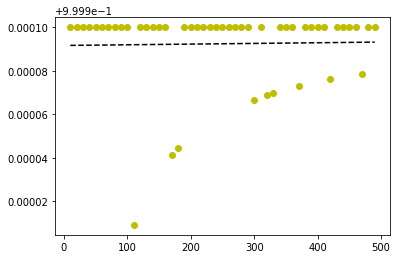

In [0]:
def totPerc(numTrails):
  numPerc = 0
  p=0.9
  n=10
  for _ in range(numTrails):
    grid3 = numpy.array((numpy.random.rand(n, n) > p).astype(int))
    result = findPercolation(grid3)
    #print(result)  #check the result, should contain some True and some False 
    if result:
       numPerc += 1
  return numPerc/numTrails

def avePerc(numTrails, num):
  numT = [totPerc(numTrails) for _ in range(num)]  
  return (sum(numT)/num)

xval = (range(10,500,10)) ##this chunk of lines might be slow 
avgT = [avePerc(i,100) for i in xval]

fit = numpy.polyfit(xval,avgT,1)
fit_fn = numpy.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(xval,avgT, 'yo', xval, fit_fn(xval), '--k')

In [0]:
def totPerc007(p):
  numPerc = 0
  p=p
  n=20
  for _ in range(1000):
    grid3 = numpy.array((numpy.random.rand(n, n) > p).astype(int))
    result = findPercolation(grid3)
    #print(result)  #check the result, should contain some True and some False 
    if result:
       numPerc += 1
  return numPerc/1000


  

As expected, when p=0.9, almost every points is at 1 indicating that almost all the trails have had 100% percolation happened. One intersting observation, for p=0.9 there are relatively more "outliers" compare to when p=0.1. Although the "outliers" for p=0.9 are not much different from the majority of the points in terms of numerical values. 

While holding n constant and changing p, I found that whne p is increasing, the average percentage of percoltation is incrasing. Also, it probably increase at an increasing rate though this is proved with graph. 

#Percolation percentage vs. n holding p constant

For this part, I used different sizes of matrix n=20, 40, 50, 75, and 100. For the p, I used p=0.5. The functions and codes are exactly the same as before. 

##When n = 20

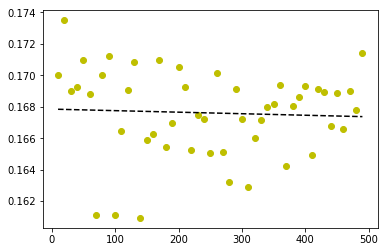

In [0]:
def totPerc(numTrails):
  numPerc = 0
  p=0.5
  n=20
  for _ in range(numTrails):
    grid3 = numpy.array((numpy.random.rand(n, n) > p).astype(int))
    result = findPercolation(grid3)
    #print(result)  #check the result, should contain some True and some False 
    if result:
       numPerc += 1
  return numPerc/numTrails

def avePerc(numTrails, num):
  numT = [totPerc(numTrails) for _ in range(num)]  
  return (sum(numT)/num)

xval = (range(10,500,10)) ##this chunk of lines might be slow 
avgT = [avePerc(i,100) for i in xval]

fit = numpy.polyfit(xval,avgT,1)
fit_fn = numpy.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(xval,avgT, 'yo', xval, fit_fn(xval), '--k')

When n=20, it seems like the most of the trails have had around 16.8% average percolation happened. 

##When n = 40

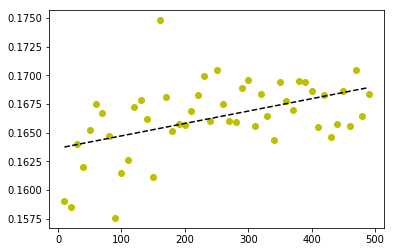

In [0]:
def totPerc(numTrails):
  numPerc = 0
  p=0.5
  n=40
  for _ in range(numTrails):
    grid3 = numpy.array((numpy.random.rand(n, n) > p).astype(int))
    result = findPercolation(grid3)
    #print(result)  #check the result, should contain some True and some False 
    if result:
       numPerc += 1
  return numPerc/numTrails

def avePerc(numTrails, num):
  numT = [totPerc(numTrails) for _ in range(num)]  
  return (sum(numT)/num)

xval = (range(10,500,10)) ##this chunk of lines might be slow 
avgT = [avePerc(i,100) for i in xval]

fit = numpy.polyfit(xval,avgT,1)
fit_fn = numpy.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(xval,avgT, 'yo', xval, fit_fn(xval), '--k')

For n=40, it sems like most of the trails have had between 16.5% and 17% average percolation happened. 

##When n = 50

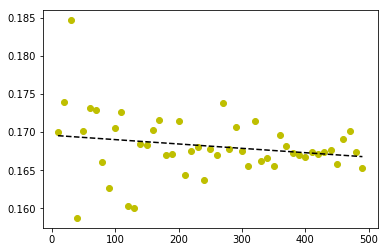

In [0]:
def totPerc(numTrails):
  numPerc = 0
  p=0.5
  n=50
  for _ in range(numTrails):
    grid3 = numpy.array((numpy.random.rand(n, n) > p).astype(int))
    result = findPercolation(grid3)
    #print(result)  #check the result, should contain some True and some False 
    if result:
       numPerc += 1
  return numPerc/numTrails

def aveperc(numTrails, num):
  numT = [totPerc(numTrails) for _ in range(num)]  
  return (sum(numT)/num)

xval = (range(10,500,10)) ##this chunk of lines might be slow 
avgT = [avePerc(i,100) for i in xval]

fit = numpy.polyfit(xval,avgT,1)
fit_fn = numpy.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(xval,avgT, 'yo', xval, fit_fn(xval), '--k')

For n=50, it seemsl ike most of the trails have had around 17% average percolation happened. 

## When n = 75

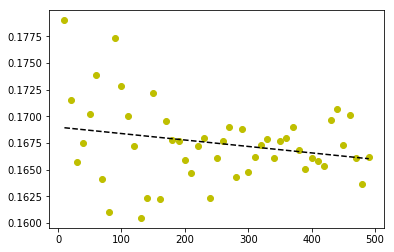

In [0]:
def totPerc(numTrails):
  numPerc = 0
  p=0.5
  n=75
  for _ in range(numTrails):
    grid3 = numpy.array((numpy.random.rand(n, n) > p).astype(int))
    result = findPercolation(grid3)
    #print(result)  #check the result, should contain some True and some False 
    if result:
       numPerc += 1
  return numPerc/numTrails

def avePerc(numTrails, num):
  numT = [totPerc(numTrails) for _ in range(num)]  
  return (sum(numT)/num)

xval = (range(10,500,10)) ##this chunk of lines might be slow 
avgT = [avePerc(i,100) for i in xval]

fit = numpy.polyfit(xval,avgT,1)
fit_fn = numpy.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(xval,avgT, 'yo', xval, fit_fn(xval), '--k')

For n=75, it seems like most of the trails have had between 16.5% and 17% average percolation happened. 

## When n = 100

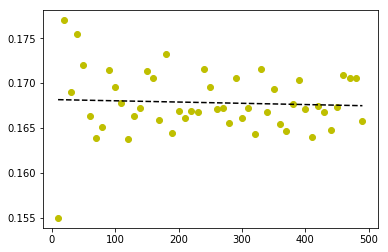

In [0]:
def totPerc(numTrails):
  numPerc = 0
  p=0.5
  n=100
  for _ in range(numTrails):
    grid3 = numpy.array((numpy.random.rand(n, n) > p).astype(int))
    result = findPercolation(grid3)
    #print(result)  #check the result, should contain some True and some False 
    if result:
       numPerc += 1
  return numPerc/numTrails

def avePerc(numTrails, num):
  numT = [totPerc(numTrails) for _ in range(num)]  
  return (sum(numT)/num)

xval = (range(10,500,10)) ##this chunk of lines might be slow 
avgT = [avePerc(i,100) for i in xval]

fit = numpy.polyfit(xval,avgT,1)
fit_fn = numpy.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(xval,avgT, 'yo', xval, fit_fn(xval), '--k')

When n=100, most of the points are around 0.166 indicating that the majorit yof the trails have had 17% average percolation happened. 

Ovarall, it does not seem like the average percentage of percolation depends so much on the size of matrix n. From above, when n=20 and n=100, most of the trails have on average around 17% percolation happened. 

#Limitation and Discussion 


*   When testing both the relationship between n and percolation and p and percolation, I have to copy the whole chunk of functions and codes each time I testa p or n. This is not so efficient. In the future, it might worth to try the make p or n like a floating value and make a plot with p on x-axis and average percentage of percolation on y-axis
*   It might also be a good idea to get more information about the regression line. In R we could just use lm function and summary(), but I have not learned this in Python. it might be a good idea for me to further explore how to do data analysis on my own since python has a lot of fascinating features and build-in functions. 


*   Moreoever, for both p and n parts, it might be a good idea to put all the graphs(ex. p=0.1, 0.2.... or n=10, 20...) together with different colors of dots. This way could be a better illustration of the relations of p and n and percentage of percolation. 



